In [58]:

# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [59]:

df = pd.read_csv('data/traindata1.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States,0
1,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States,0
2,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India,1
3,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
4,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0


In [60]:
df.loc[df.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
5721,44,Private,367749,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,Mexico,0
9853,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0
15108,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0
16958,42,Private,204235,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
18372,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0
18382,23,Private,240137,5th-6th,3,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,55,Mexico,0
19488,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
19733,39,Private,30916,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
20026,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,0
20405,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0


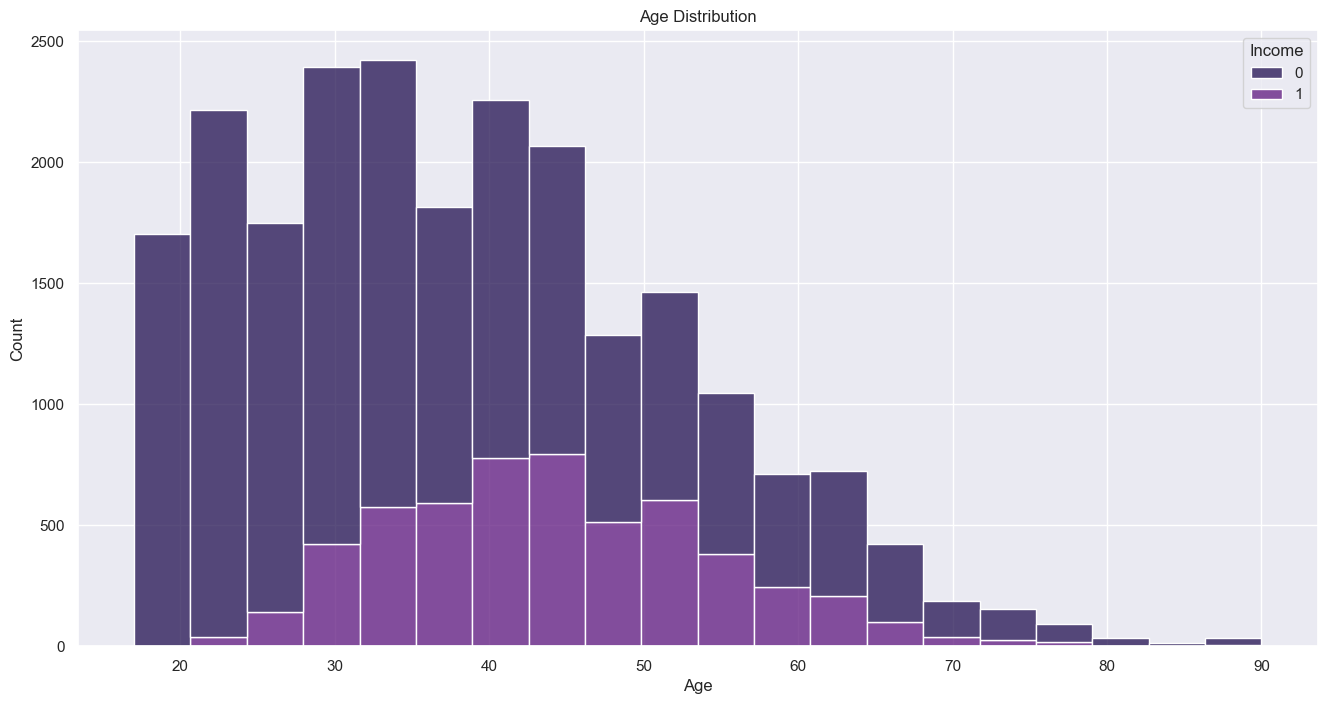

In [61]:

# Age
plt.figure(figsize=(16, 8))
sns.set_theme(style="darkgrid")
sns.set_palette("magma")
sns.histplot(data=df, x='age', hue='Income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


In [62]:

df.groupby('workclass').size()

workclass
?                    1278
Federal-gov           678
Local-gov            1489
Never-worked            5
Private             15879
Self-emp-inc          792
Self-emp-not-inc     1734
State-gov             929
Without-pay             8
dtype: int64

**age distribution for workclass "?"** 
 count    1278.000000
mean       41.017997
std        20.377306
min        17.000000
25%        21.000000
50%        35.000000
75%        61.000000
max        90.000000
Name: age, dtype: float64


<Axes: title={'center': 'age distribution for workclass "?"'}, xlabel='age', ylabel='Count'>

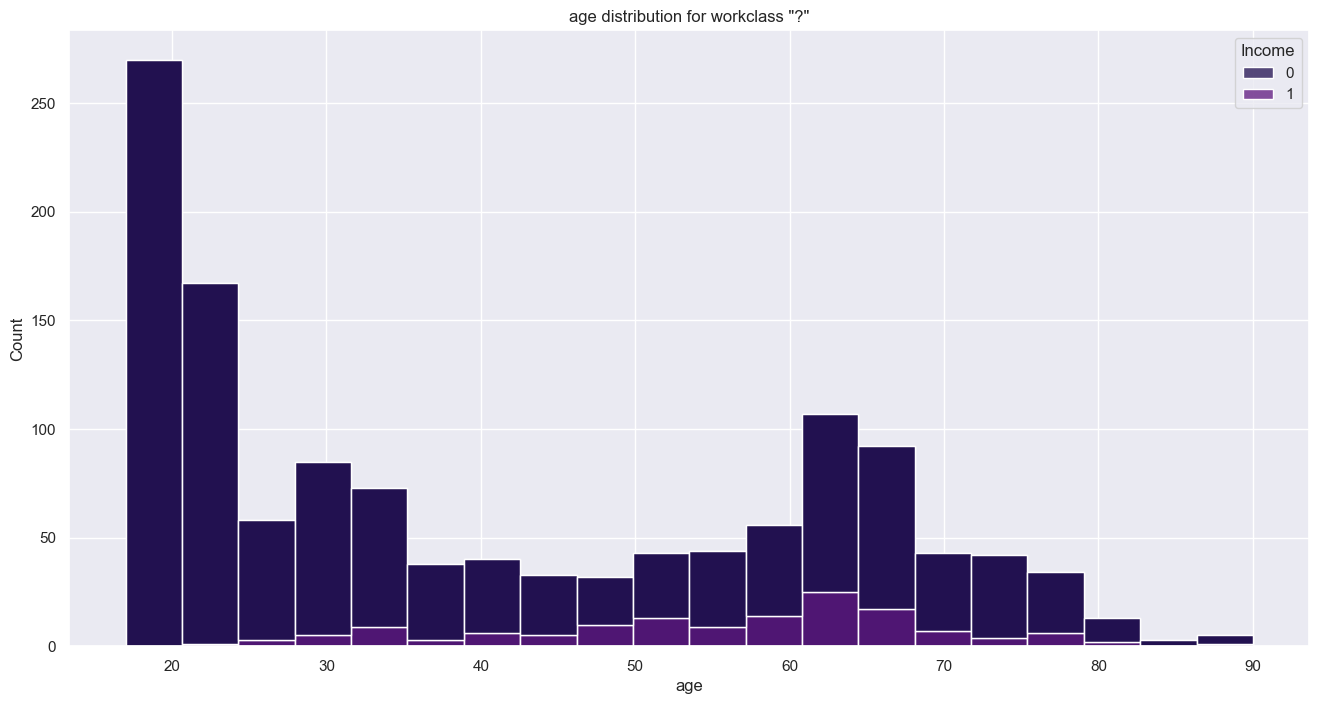

In [63]:

workclass_unknown = df.loc[df['workclass'] == '?']
print('**age distribution for workclass "?"** \n', workclass_unknown['age'].describe())
plt.figure(figsize=(16, 8))
plt.title('age distribution for workclass "?"')
plt.hist(workclass_unknown['age'], bins=20)
sns.histplot(data=df.loc[df['workclass'] == '?'], x='age', hue='Income', bins=20, multiple='stack')

In [64]:


print(df.query('age < 20').groupby('workclass').size())
print(df.query('age > 20 and age < 60').groupby('workclass').size())
print(df.query('age > 60').groupby('workclass').size())

workclass
?                   191
Federal-gov           6
Local-gov            30
Never-worked          3
Private             878
Self-emp-inc         12
Self-emp-not-inc     26
State-gov            24
Without-pay           2
dtype: int64
workclass
?                     648
Federal-gov           615
Local-gov            1331
Never-worked            1
Private             13702
Self-emp-inc          663
Self-emp-not-inc     1426
State-gov             824
Without-pay             4
dtype: int64
workclass
?                   339
Federal-gov          44
Local-gov           104
Private             765
Self-emp-inc        104
Self-emp-not-inc    244
State-gov            54
Without-pay           2
dtype: int64


In [65]:


df.loc[df['workclass'] == '?', 'workclass'] = 'Private'
df.loc[df['workclass'] == '?' ]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income


Text(0.5, 1.0, 'Workclass')

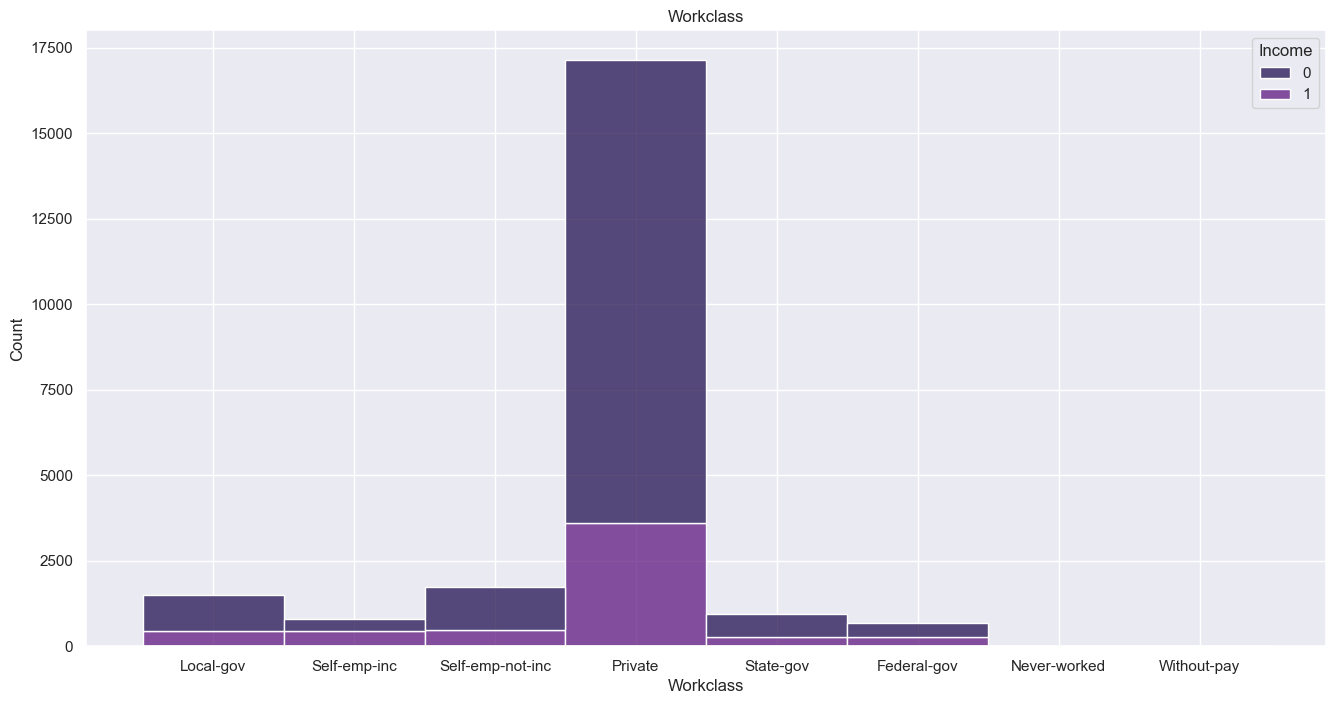

In [66]:

plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='workclass', hue='Income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')

Text(0.5, 0, 'Final Weight')

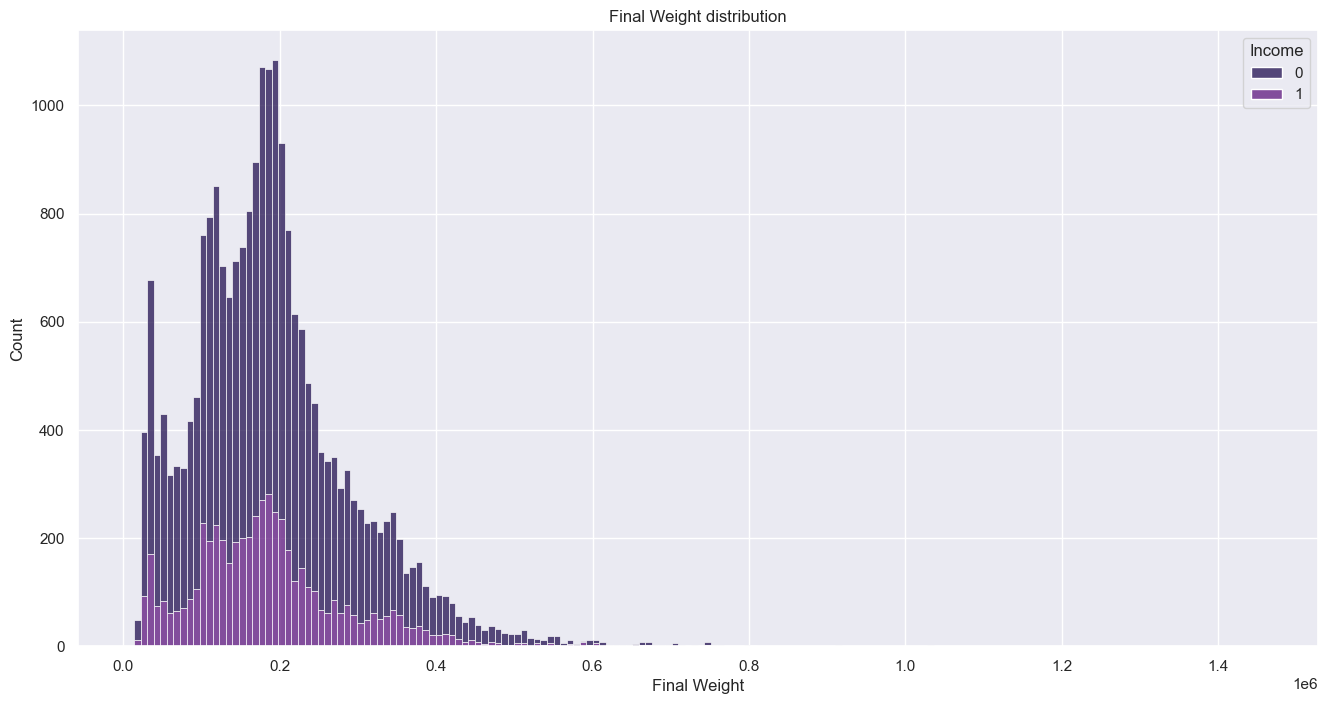

In [67]:

# Final Weight
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=df, hue='Income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

In [68]:

# Education
df.groupby('education').size()

education
10th             641
11th             840
12th             292
1st-4th          121
5th-6th          239
7th-8th          451
9th              374
Assoc-acdm       752
Assoc-voc        970
Bachelors       3742
Doctorate        297
HS-grad         7367
Masters         1193
Preschool         39
Prof-school      414
Some-college    5060
dtype: int64

([<matplotlib.patches.Wedge at 0x26474806190>,
 [Text(1.0957092707827263, 0.09706283491010402, '10th'),
  Text(1.0532813867675739, 0.3171723826075915, '11th'),
  Text(0.9911972823427058, 0.47699889672454643, '12th'),
  Text(0.9624522419653586, 0.5326215184686542, '1st-4th'),
  Text(0.9348489282998876, 0.5797046500215016, '5th-6th'),
  Text(0.8755726206513547, 0.665862287538286, '7th-8th'),
  Text(0.7943614867485447, 0.7609138113943272, '9th'),
  Text(0.6671890525013423, 0.874562043666635, 'Assoc-acdm'),
  Text(0.4428440100989255, 1.006920643705105, 'Assoc-voc'),
  Text(-0.25628861215194265, 1.0697271368350114, 'Bachelors'),
  Text(-0.7828400880541888, 0.7727621862742186, 'Doctorate'),
  Text(-1.057927635929925, -0.3013123248984682, 'HS-grad'),
  Text(-0.124516921239224, -1.0929297947833179, 'Masters'),
  Text(0.061980178912668216, -1.0982524561420084, 'Preschool'),
  Text(0.13039015779217245, -1.0922446643270602, 'Prof-school'),
  Text(0.8431251170817835, -0.7064984337886595, 'Some-col

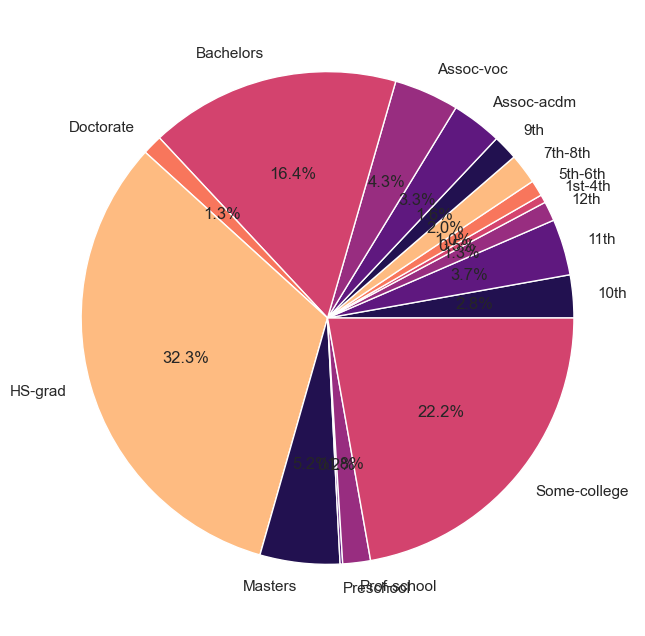

In [69]:

plt.figure(figsize=(16, 8))
plt.pie(df.groupby('education').size(), labels=df.groupby('education').size().index, autopct='%1.1f%%')

<Axes: xlabel='education', ylabel='count'>

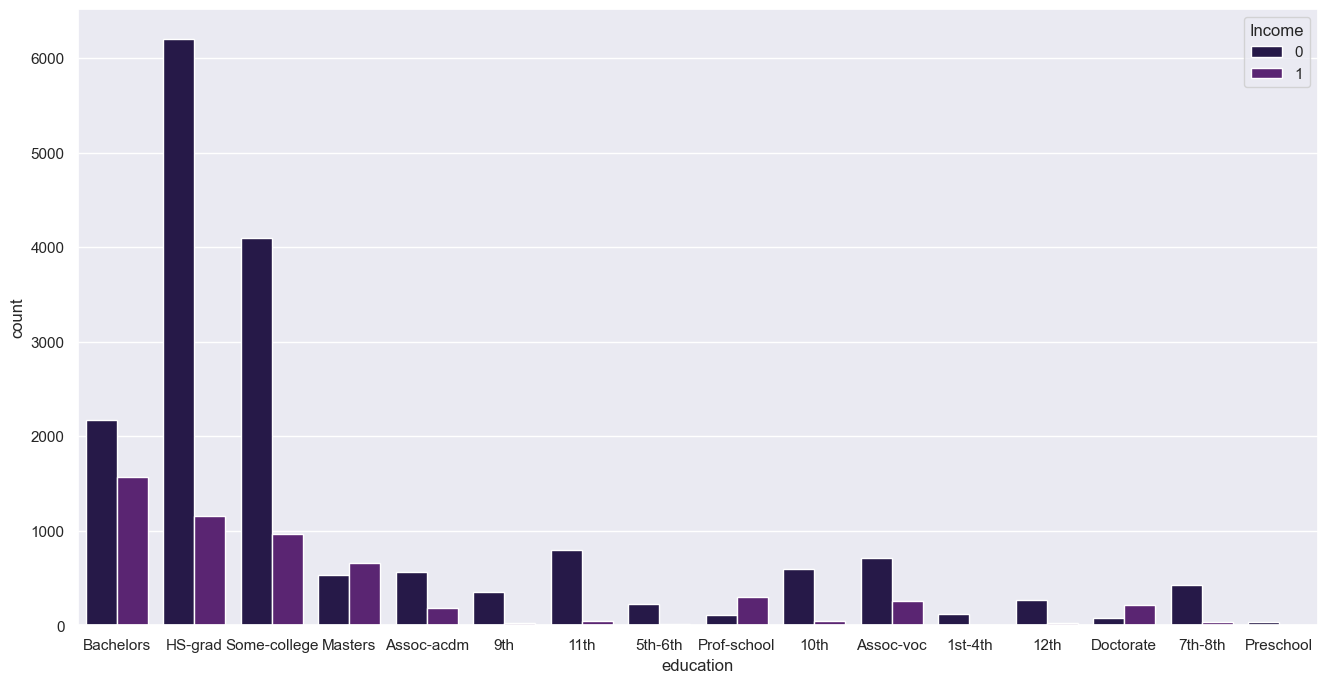

In [70]:

plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=df, hue='Income')

In [71]:

# Education Number
df.groupby('education.num').size()

education.num
1       39
2      121
3      239
4      451
5      374
6      641
7      840
8      292
9     7367
10    5060
11     970
12     752
13    3742
14    1193
15     414
16     297
dtype: int64

In [72]:

df['education.num'].describe()

count    22792.000000
mean        10.075509
std          2.584257
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

<Axes: xlabel='education.num', ylabel='count'>

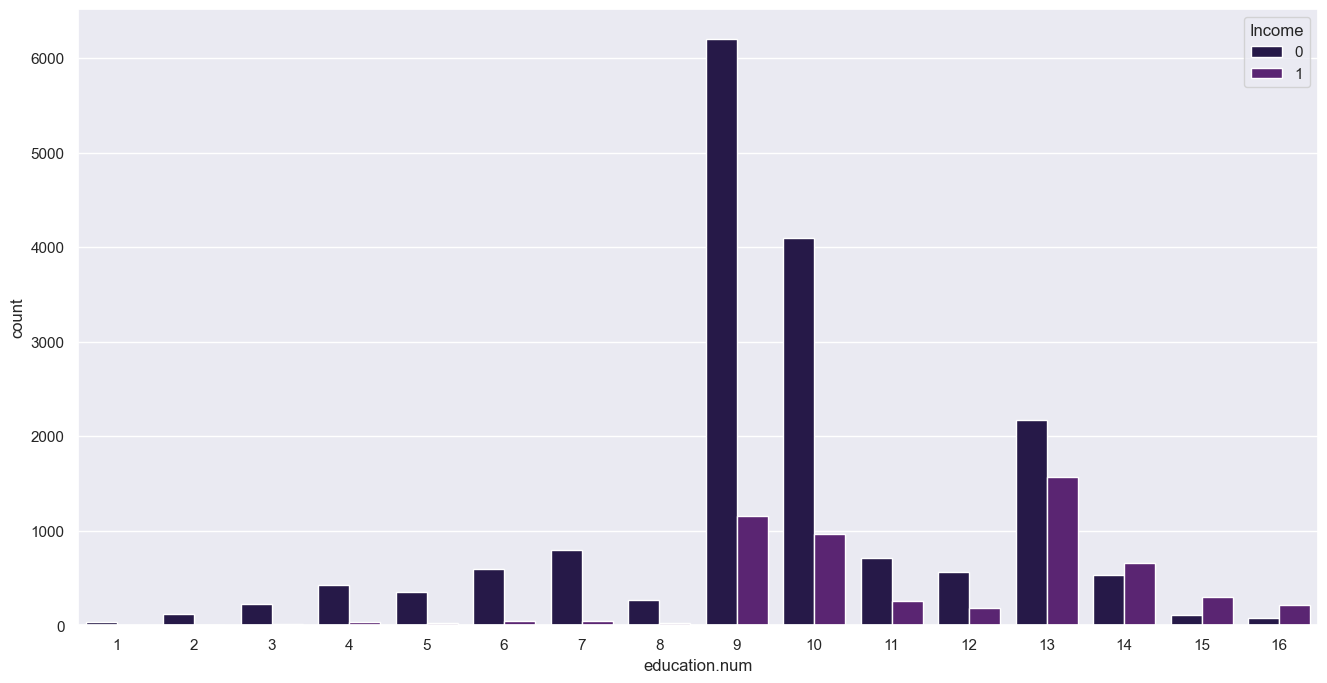

In [73]:

plt.figure(figsize=(16, 8))
sns.countplot(x='education.num', data=df, hue='Income')

marital.status
Divorced                  3103
Married-AF-spouse           17
Married-civ-spouse       10452
Married-spouse-absent      291
Never-married             7499
Separated                  736
Widowed                    694
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

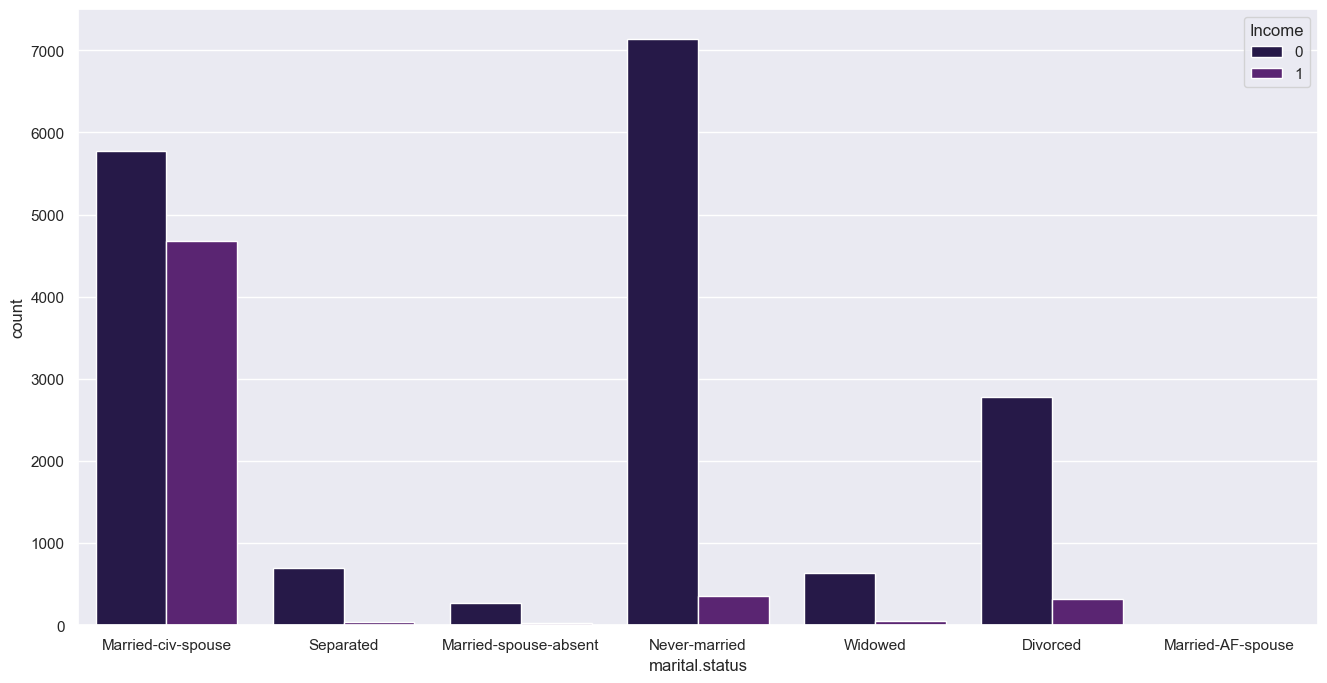

In [74]:

# marital status
print(df.groupby('marital.status').size())
plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='marital.status', hue='Income')


occupation
?                    1283
Adm-clerical         2652
Armed-Forces            7
Craft-repair         2876
Exec-managerial      2772
Farming-fishing       706
Handlers-cleaners     960
Machine-op-inspct    1433
Other-service        2349
Priv-house-serv       110
Prof-specialty       2907
Protective-serv       453
Sales                2505
Tech-support          629
Transport-moving     1150
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

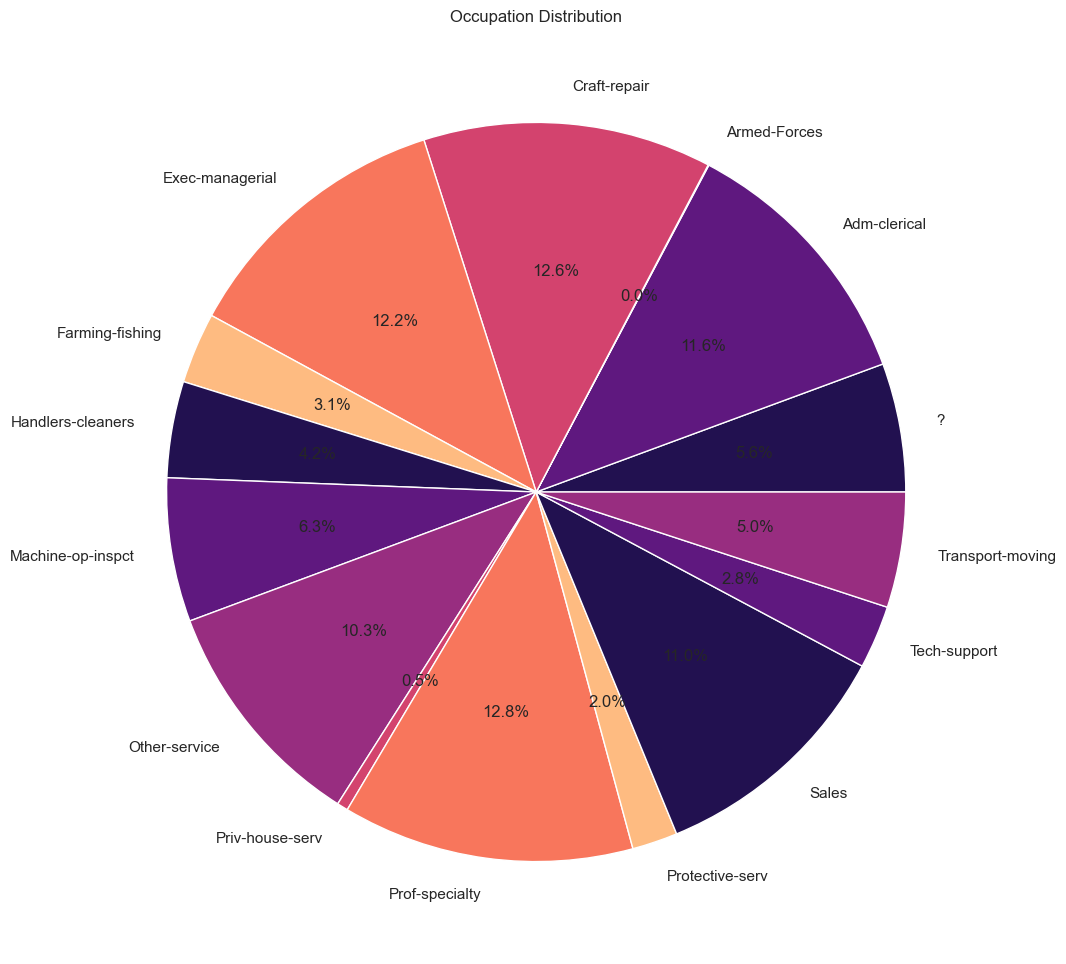

In [75]:

# Occupation
print(df.groupby('occupation').size())
plt.figure(figsize=(16, 12))
plt.pie(df.groupby('occupation').size(), labels=df.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

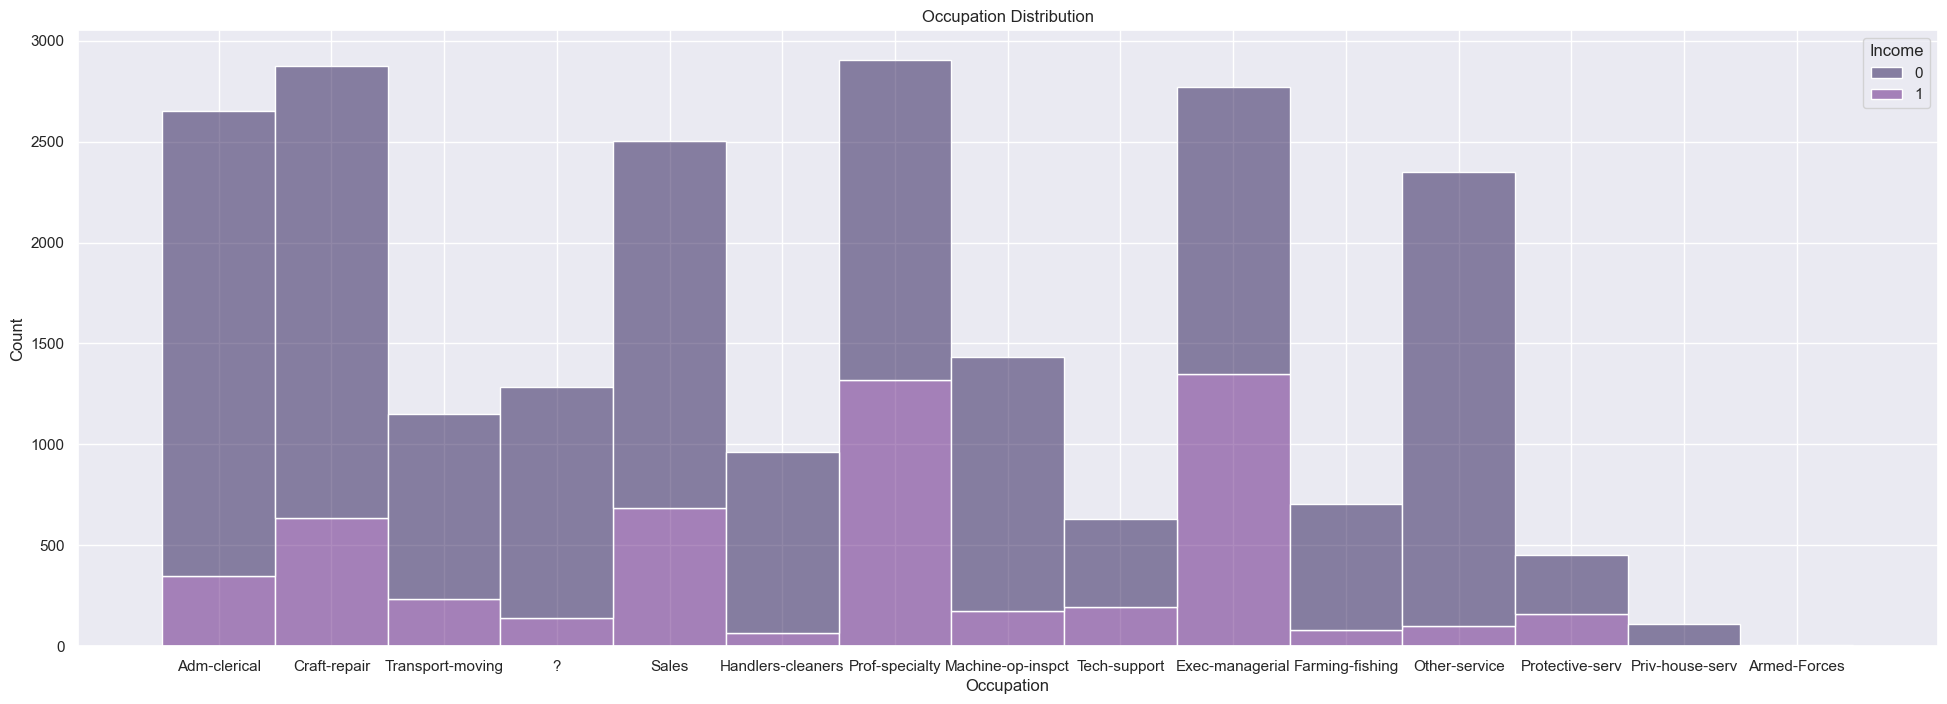

In [76]:

plt.figure(figsize=(24, 8))
sns.histplot(data=df, x='occupation', hue='Income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

Text(0.5, 1.0, 'Occupation Distribution')

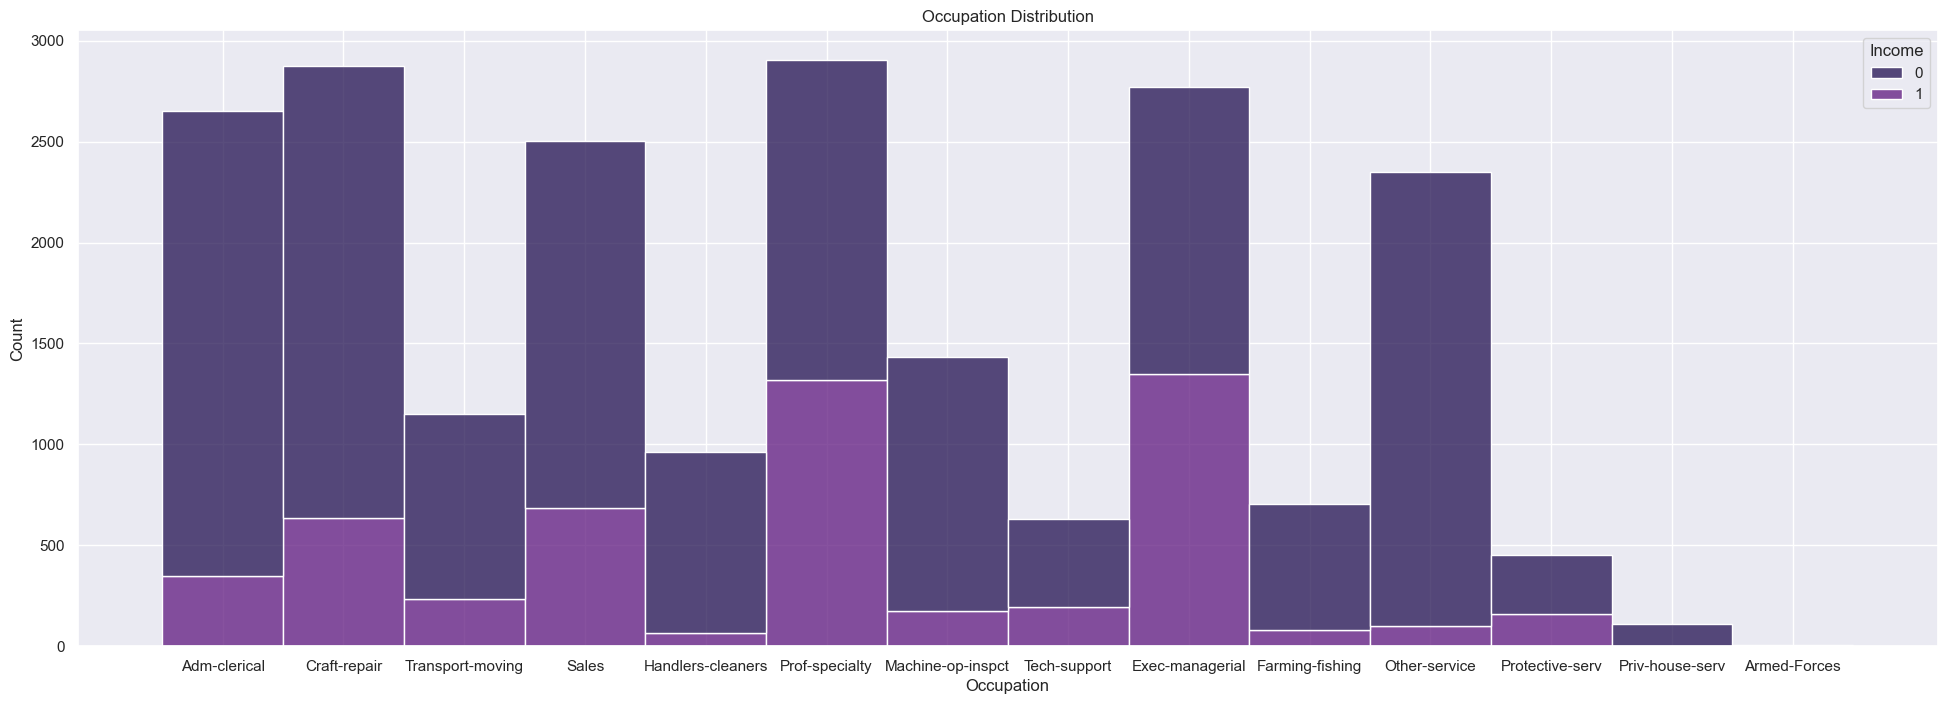

In [77]:


df.drop(df.loc[df['occupation'] == '?'].index, inplace=True)
plt.figure(figsize=(24, 8))
sns.histplot(data=df, x='occupation', hue='Income', multiple='stack')
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

relationship
Husband           8863
Not-in-family     5507
Other-relative     662
Own-child         3199
Unmarried         2273
Wife              1005
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

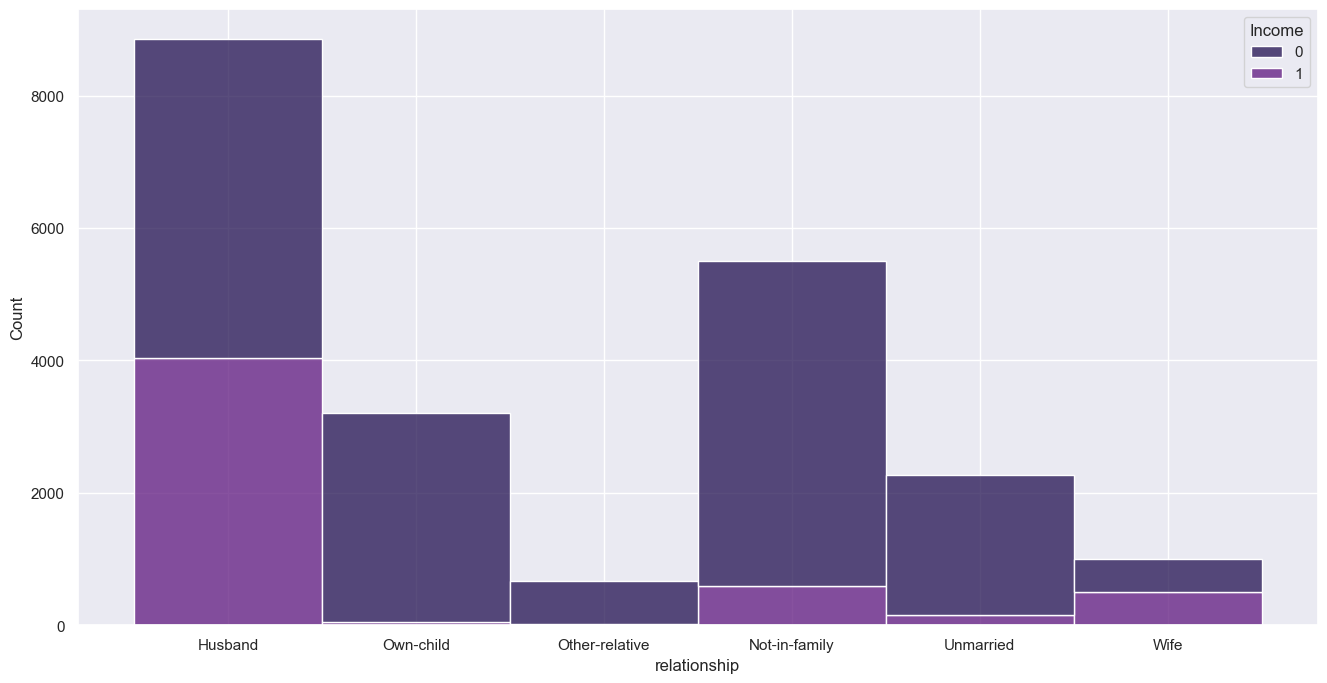

In [78]:

# Relationship
print(df.groupby('relationship').size())
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='relationship', hue='Income', multiple='stack')

race
Amer-Indian-Eskimo      201
Asian-Pac-Islander      696
Black                  2028
Other                   176
White                 18408
dtype: int64


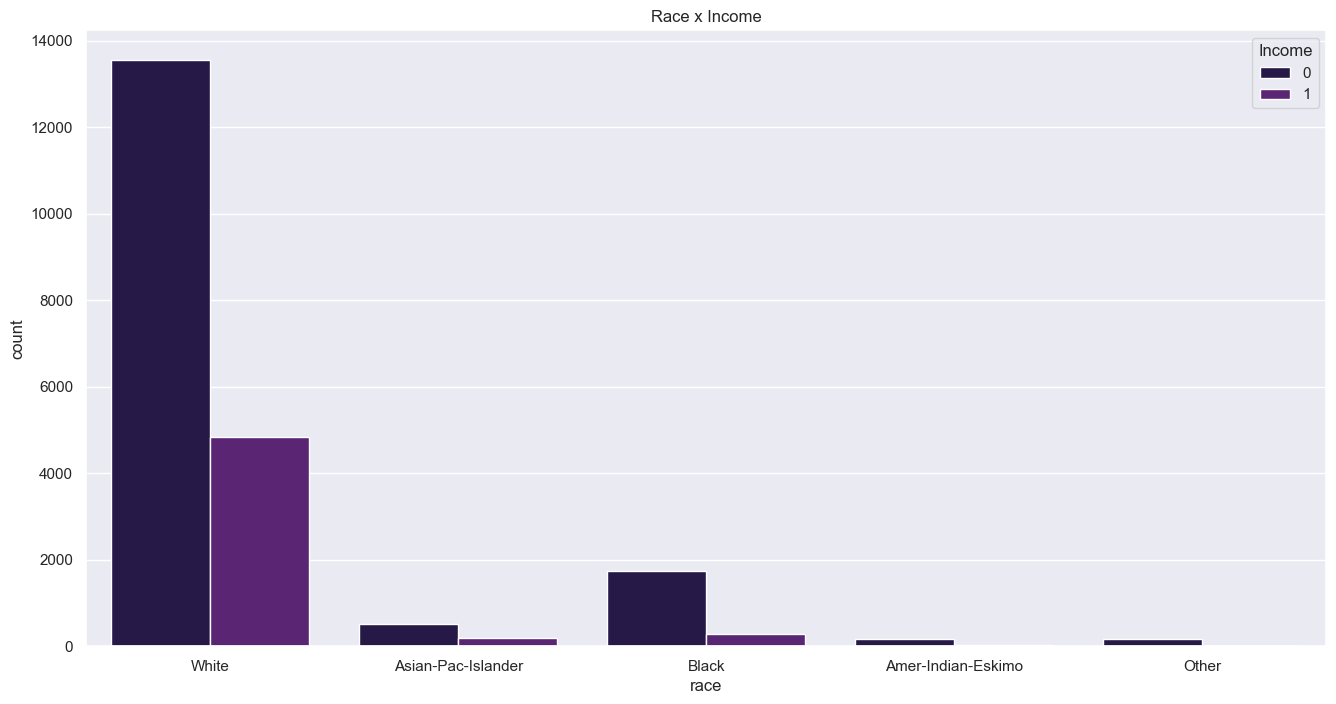

sex
Female     6946
Male      14563
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

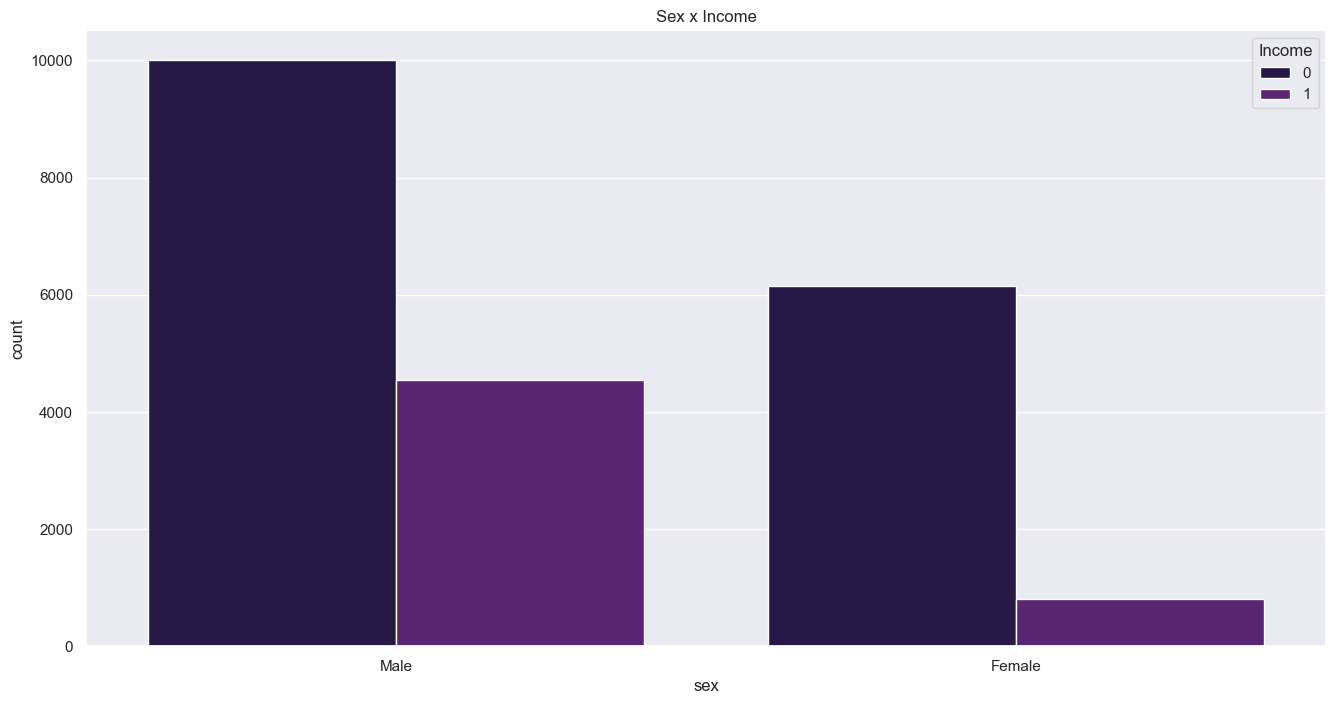

In [79]:

# Race and Sex
plt.figure(figsize=(16, 8))
print(df.groupby(df.race).size())
sns.countplot(data=df, x='race', hue='Income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(df.groupby(df.sex).size())
sns.countplot(data=df, x='sex', hue='Income')
plt.title('Sex x Income')

In [80]:

# Capital Gain & Capital Loss
print('**** capital gain **** \n ', df.groupby('capital.gain').size(), '\n')
print('**** capital loss **** \n ', df.groupby('capital.loss').size(), '\n')

**** capital gain **** 
  capital.gain
0        19716
114          5
401          1
594         21
914          7
         ...  
25236        7
27828       25
34095        3
41310        1
99999      103
Length: 115, dtype: int64 

**** capital loss **** 
  capital.loss
0       20508
213         2
323         2
625         7
653         3
        ...  
2824        4
3004        2
3683        2
3770        2
3900        2
Length: 85, dtype: int64 


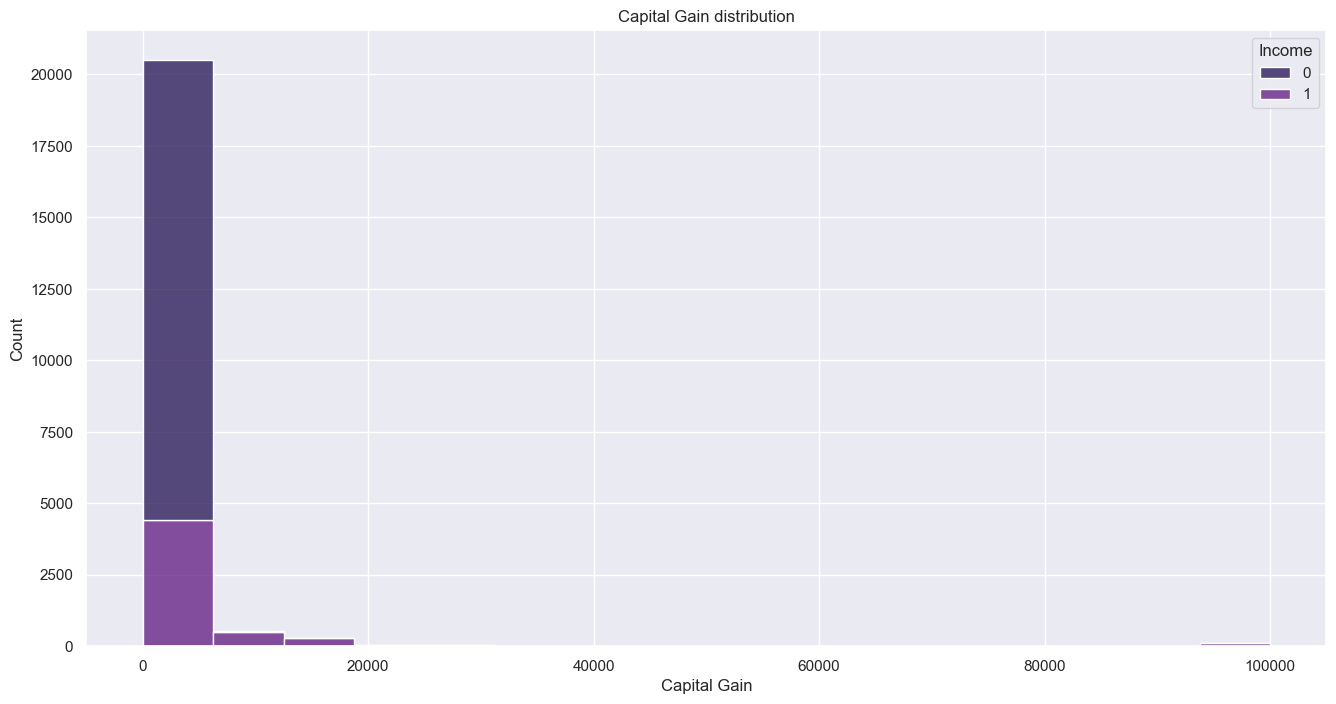

Text(0.5, 0, 'Capital Loss')

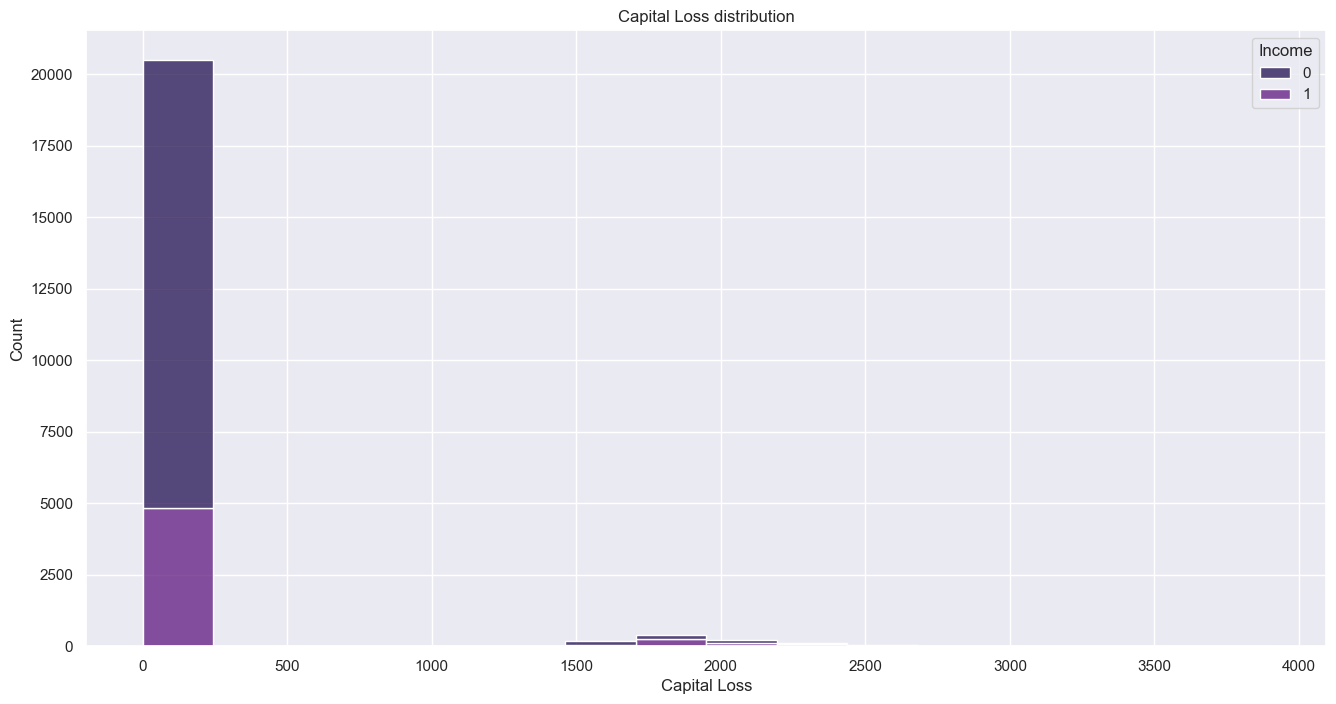

In [81]:

plt.figure(figsize=(16, 8))
sns.histplot(x='capital.gain', data=df, hue='Income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.loss', data=df, hue='Income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')

In [82]:

# Hours per week
df.groupby('hours.per.week').size()

hours.per.week
1      6
2     11
3     12
4     18
5     25
      ..
92     1
94     1
95     2
98     7
99    54
Length: 92, dtype: int64

In [83]:

df = df.drop(columns=['hours.per.week'])

In [84]:

# Native Country
df.groupby('native.country').size()

native.country
?                               405
Cambodia                         13
Canada                           65
China                            54
Columbia                         36
Cuba                             70
Dominican-Republic               44
Ecuador                          21
El-Salvador                      68
England                          65
France                           18
Germany                          85
Greece                           19
Guatemala                        47
Haiti                            22
Honduras                          7
Hong                             13
Hungary                           8
India                            61
Iran                             27
Ireland                          17
Italy                            52
Jamaica                          55
Japan                            42
Laos                             11
Mexico                          442
Nicaragua                        19
Outlying-US(G

([<matplotlib.patches.Wedge at 0x26472984050>,
 [Text(1.0980759985736384, 0.06503154124351841, '?'),
  Text(1.0920622275985086, 0.13190940471620466, 'Cambodia'),
  Text(1.0904885943253837, 0.14434204393124284, 'Canada'),
  Text(1.0878151857095715, 0.16327315070044696, 'China'),
  Text(1.0855749787554334, 0.1775583439327492, 'Columbia'),
  Text(1.0826959723545078, 0.1943435912175322, 'Cuba'),
  Text(1.0793100656902006, 0.2123435473467818, 'Dominican-Republic'),
  Text(1.0772454945303065, 0.22258064721389284, 'Ecuador'),
  Text(1.074261169357295, 0.2365648748464094, 'El-Salvador'),
  Text(1.0694632827405681, 0.25738742562481154, 'England'),
  Text(1.0662644821294294, 0.27033322797847104, 'France'),
  Text(1.0620770500203303, 0.28634304569888347, 'Germany'),
  Text(1.0576050838941948, 0.3024425342460172, 'Greece'),
  Text(1.0546404658344497, 0.3126235560934193, 'Guatemala'),
  Text(1.051436308516017, 0.32323627447149395, 'Haiti'),
  Text(1.0500577408360485, 0.32768695566087785, 'Honduras'

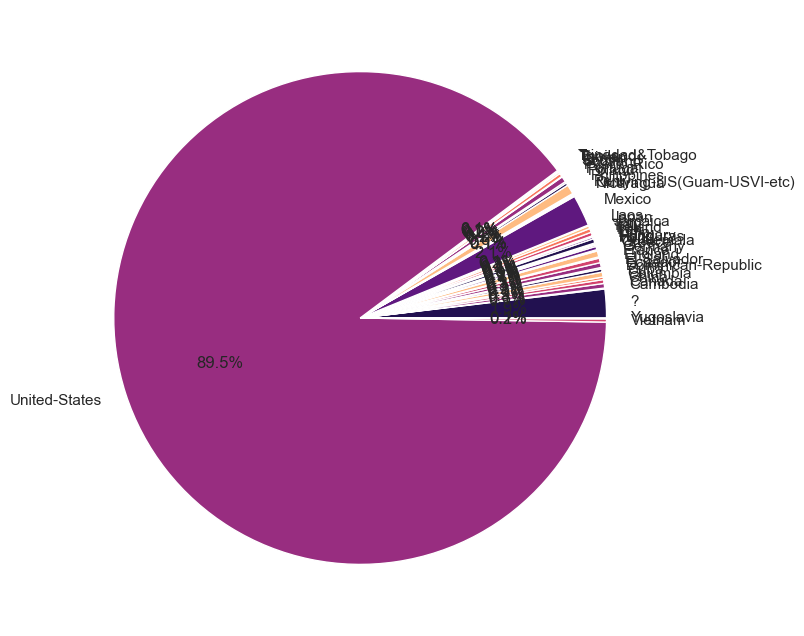

In [85]:


plt.figure(figsize=(16, 8))
plt.pie(df.groupby('native.country').size(), labels=df.groupby('native.country').size().index, autopct='%1.1f%%')

In [86]:


label_encoder = LabelEncoder()
categorical_columns = ['Income', 'workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)


In [87]:

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Income']), df['Income'], test_size=0.2, random_state=42)

In [88]:


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**** ACCURACY_SCORE **** 

 0.8349604834960483 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.87      0.91      0.89      3190
           1       0.71      0.62      0.66      1112

    accuracy                           0.83      4302
   macro avg       0.79      0.76      0.78      4302
weighted avg       0.83      0.83      0.83      4302
 

**** CONFUSION MATRIX ****


<Axes: >

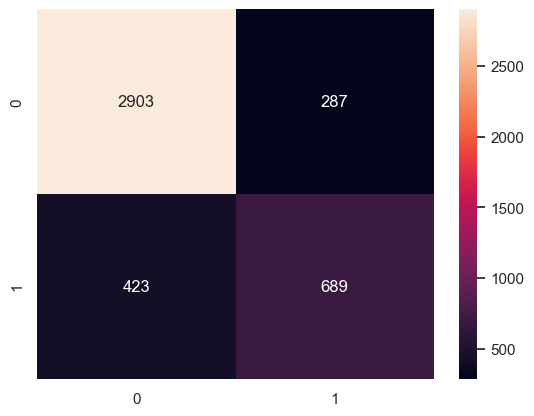

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

**** ACCURACY_SCORE **** 

 0.8582054858205486 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.89      0.93      0.91      3190
           1       0.76      0.66      0.71      1112

    accuracy                           0.86      4302
   macro avg       0.82      0.79      0.81      4302
weighted avg       0.85      0.86      0.85      4302
 

**** CONFUSION MATRIX ****


<Axes: >

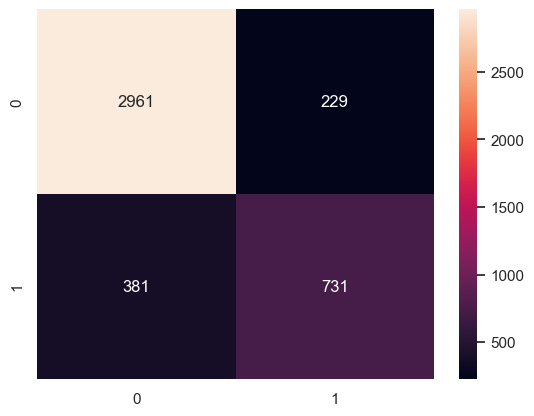

In [90]:

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')